In [1]:
from SALA import processing
from SALA import plots
import pandas as pd
import numpy as np
import datetime
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
timet_raw = pd.read_parquet('data/timet/raw/timet_raw.parquet')
timet_raw

,Off-Wrist Status,Activity,Marker,White Light,Red Light,Green Light,Blue Light,Sleep/Wake,Interval Status,UID,Group
DateTime,,,,,,,,,,,
2019-09-27 15:14:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,timetTIMET-010,timet
2019-09-27 15:14:30,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,timetTIMET-010,timet
2019-09-27 15:15:00,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,timetTIMET-010,timet
2019-09-27 15:15:30,0,NaN,0.0,NaN,NaN,NaN,NaN,NaN,ACTIVE,timetTIMET-010,timet
2019-09-27 15:16:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,timetTIMET-010,timet
...,...,...,...,...,...,...,...,...,...,...,...
2020-10-18 10:28:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,timetTIMET-031,timet
2020-10-18 10:28:30,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,timetTIMET-031,timet
2020-10-18 10:29:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,EXCLUDED,timetTIMET-031,timet


In [5]:
timet_processed = pd.read_parquet('data/timet/processed/timettiming.parquet')
timet_processed

,UID,Date,Threshold,Last Light,Mins to LL from 4AM,First Light,Mins to FL from 4AM,Time above threshold,Time above threshold AM,Minutes above threshold,...,GroupDayofWeek,GroupDayType,Weekend/Holiday,Sunrise,Sunset,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM
index,,,,,,,,,,,,,,,,,,,,,
0,timetTIMET-010,2019-10-26,5,2019-10-26 16:49:00,769.0,2019-10-26 06:34:30,154.0,0 days 09:20:30,0 days 04:46:30,560.5,...,timetSat,timetWeekend/Holiday,True,2019-10-26 07:42:30.430341+01:00,2019-10-26 17:44:39.587974+01:00,2019-10-27 15:02:30,2019-10-27 15:18:30,0 days 00:16:00,2342.5,918.5
1,timetTIMET-010,2019-10-28,5,2019-10-28 21:52:00,1072.0,2019-10-28 06:49:00,169.0,0 days 10:23:00,0 days 03:34:30,623.0,...,timetMon,timetWeekday,False,2019-10-28 06:46:00.523509+00:00,2019-10-28 16:40:47.823368+00:00,2019-10-28 21:55:00,2019-10-29 06:02:00,0 days 08:07:00,1315.0,362.0
2,timetTIMET-010,2019-10-04,5,NaT,NaN,NaT,NaN,NaT,NaT,NaN,...,timetFri,timetWeekday,False,2019-10-04 07:05:12.690400+01:00,2019-10-04 18:31:30.932515+01:00,2019-10-04 00:00:00,2019-10-04 00:00:00,0 days 00:00:00,0.0,0.0
3,timetTIMET-010,2019-10-31,5,2019-10-31 23:22:00,1162.0,2019-10-31 07:10:30,190.0,0 days 10:20:30,0 days 04:04:00,620.5,...,timetThu,timetWeekday,False,2019-10-31 06:51:16.997224+00:00,2019-10-31 16:35:10.478547+00:00,2019-10-31 23:27:00,2019-11-01 08:01:30,0 days 08:34:30,1407.0,481.5
4,timetTIMET-010,2019-10-29,5,2019-10-29 22:38:30,1118.0,2019-10-29 06:16:00,136.0,0 days 11:17:00,0 days 04:11:30,677.0,...,timetTues,timetWeekday,False,2019-10-29 06:47:45.858930+00:00,2019-10-29 16:38:53.955015+00:00,2019-10-29 22:42:30,2019-10-30 06:31:30,0 days 07:49:00,1362.5,391.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,timetTIMET-031,2020-10-03,500,2020-10-03 22:09:00,1089.0,2020-10-03 10:11:00,371.0,0 days 04:02:30,0 days 00:01:00,242.5,...,timetSat,timetWeekend/Holiday,True,2020-10-03 07:04:48.873556+01:00,2020-10-03 18:32:03.688399+01:00,2020-10-03 22:26:30,2020-10-04 05:59:30,0 days 07:33:00,1346.5,359.5
951,timetTIMET-031,2020-10-02,500,2020-10-02 18:00:30,840.0,2020-10-02 12:17:30,497.0,0 days 00:47:30,0 days 00:00:00,47.5,...,timetFri,timetWeekday,False,2020-10-02 07:03:10.535306+01:00,2020-10-02 18:34:19.341055+01:00,2020-10-03 00:18:00,2020-10-03 07:25:30,0 days 07:07:30,1458.0,445.5
952,timetTIMET-031,2020-09-26,500,2020-09-26 20:46:30,1006.0,2020-09-26 08:02:30,242.0,0 days 04:12:00,0 days 01:30:30,252.0,...,timetSat,timetWeekend/Holiday,True,2020-09-26 06:53:25.279367+01:00,2020-09-26 18:48:00.359463+01:00,2020-09-26 21:27:00,2020-09-27 03:46:00,0 days 06:19:00,1287.0,226.0


In [15]:
#calculate total activity from wakeup to sleep and divides it by the amount of time the person was awake aka sleep-wakeup
def calculateActivity(wakeup, sleep, raw):
    if len(raw[(raw['DateTime']>wakeup) & (raw['DateTime']<sleep)].groupby('Group').sum().get('Activity')) == 0:
        return 0
    total_activity = raw[(raw['DateTime']>wakeup) & (raw['DateTime']<sleep)].groupby('Group').sum().get('Activity').iloc[0]
    total_hrs_awake = (sleep-wakeup)/datetime.timedelta(hours=1) #number of hours awake
    return total_activity/total_hrs_awake

def addActivityInfo(sleep_df, raw):
    length = sleep_df.shape[0]
    for i in range(length-1):
        sleep_df.iloc[i,sleep_df.columns.get_loc('Activity')] = calculateActivity(sleep_df['Sleep offset'].iloc[i], sleep_df['Sleep onset'].iloc[i+1], raw)
    return sleep_df

def completeActivityDataframe(sleep_df, raw):
    useful_columns = ['UID', 'Date', 'GroupDayType', 'Sleep onset', 'Sleep offset', 'Sleep duration', 'Sleep onset MSLM', 'Sleep offset MSLM']
    sleep_df = sleep_df[useful_columns].drop_duplicates() #clean sleep_df
    zero_array = sleep_df.shape[0]*[0]
    sleep_df['Activity'] = zero_array
    raw = raw.reset_index().sort_values(by='DateTime')
    output = pd.DataFrame()
    for uid in sleep_df.UID.unique():
        unique_df = sleep_df[sleep_df['UID'] == uid].sort_values('Date')
        unique_raw = raw[raw['UID'] == uid]
        output = output.append(addActivityInfo(unique_df, unique_raw))
    return output

In [16]:
#converts column Sleep duration from a timedelta to a float
def timedeltaToFloat(timedelta):
    return timedelta/datetime.timedelta(hours=1)

#earliest_bedtime must be greater than all bedtimes in activity_df. Even if it's just by 0.0001
def standarize_bedtime(bedtime, earliest_bedtime):
    if earliest_bedtime<=bedtime<=24:
        return bedtime-earliest_bedtime
    elif bedtime<16:
        return (24-earliest_bedtime)+bedtime
    else:
        return "error with standarizing"

In [17]:
def createDictionaries(activity_df):
    mean_sleep_dict = {}
    std_sleep_dict = {}
    mean_bedtime_dict = {}
    std_bedtime_dict = {}
    for uid in activity_df.UID.unique():
        cur_df = activity_df[activity_df['UID']==uid]
        mean_sleep_dict[uid] = cur_df['Sleep duration'].mean()
        std_sleep_dict[uid] = cur_df['Sleep duration'].std()
        mean_bedtime_dict[uid] = cur_df['standarized_bedtime'].mean()
        std_bedtime_dict[uid] = cur_df['standarized_bedtime'].std()
    return mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict

def z_score_calculator(row, variable, mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict):
    if variable == 'Sleep duration':
        return (row['Sleep duration'] - mean_sleep_dict[row['UID']])/std_sleep_dict[row['UID']]
    elif variable == 'standarized_bedtime':
        return (row['standarized_bedtime'] - mean_bedtime_dict[row['UID']])/std_bedtime_dict[row['UID']]

def createStandarizedColumns(activity_df, mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict):
#     activity_df['sleep_duration_zscore'] = activity_df.apply(z_score_calculator, variable = 'Sleep duration',axis=1)
#     activity_df['bedtime_zscore'] = activity_df.apply(z_score_calculator, variable = 'standarized_bedtime',axis=1)
    activity_df['sleep_duration_zscore'] = activity_df.apply(z_score_calculator, args = ('Sleep duration', mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict) ,axis=1)
    activity_df['bedtime_zscore'] = activity_df.apply(z_score_calculator, args = ('standarized_bedtime', mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict),axis=1)

In [18]:
#given raw data and processed data, will return a fully cleaned activity_df that has bedtime and sleep duration columns
#that are standarized by new methods.
def do_everything(raw, processed):
    activity_df = completeActivityDataframe(processed, raw)
    activity_df['Sleep duration'] = activity_df['Sleep duration'].apply(timedeltaToFloat)
    activity_df = activity_df[(activity_df['Activity']!=0) & (activity_df['Sleep duration']!=0)]
    activity_df['bedtime'] = activity_df['Sleep onset'].dt.strftime("%H").astype(int) + activity_df['Sleep onset'].dt.strftime("%M").astype(int)/60
    plt.hist(activity_df['bedtime'], bins=10)
    plt.show()
    gap_value = input('Input a x value of the histogram where there is a gap between histogram bars. Typically somewhere between 14 and 19.')
    earliest_bedtime = activity_df[activity_df['bedtime']>15].sort_values(by='bedtime').bedtime.iloc[0]
    activity_df['standarized_bedtime'] = activity_df['bedtime'].apply(standarize_bedtime, earliest_bedtime = earliest_bedtime)
    mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict = createDictionaries(activity_df)
    createStandarizedColumns(activity_df, mean_sleep_dict, std_sleep_dict, mean_bedtime_dict, std_bedtime_dict)
    return activity_df


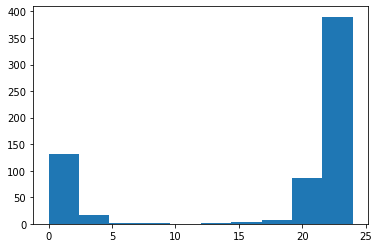

Input a x value of the histogram where there is a gap between histogram bars. Typically somewhere between 14 and 19.10


,UID,Date,GroupDayType,Sleep onset,Sleep offset,Sleep duration,Sleep onset MSLM,Sleep offset MSLM,Activity,bedtime,standarized_bedtime,sleep_duration_zscore,bedtime_zscore
index,,,,,,,,,,,,,
11,timetTIMET-010,2019-10-22,timetWeekday,2019-10-22 22:02:30,2019-10-23 04:58:30,6.933333,1322.5,298.5,12764.221922,22.033333,7.000000,0.332587,-0.160485
5,timetTIMET-010,2019-10-23,timetWeekday,2019-10-23 23:27:00,2019-10-24 06:44:00,7.283333,1407.0,404.0,16351.185410,23.450000,8.416667,0.476924,0.302802
8,timetTIMET-010,2019-10-24,timetWeekday,2019-10-24 23:11:00,2019-10-25 06:31:30,7.341667,1391.0,391.5,15367.470199,23.183333,8.150000,0.500981,0.215595
10,timetTIMET-010,2019-10-25,timetWeekday,2019-10-26 01:24:00,2019-10-26 06:29:30,5.091667,1524.0,389.5,8995.299539,1.400000,10.366667,-0.426903,0.940504
0,timetTIMET-010,2019-10-26,timetWeekend/Holiday,2019-10-27 15:02:30,2019-10-27 15:18:30,0.266667,2342.5,918.5,13260.715503,15.033333,0.000000,-2.416697,-2.449669
...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,timetTIMET-031,2020-10-02,timetWeekday,2020-10-03 00:18:00,2020-10-03 07:25:30,7.125000,1458.0,445.5,15761.420644,0.300000,9.266667,0.162433,0.641995
946,timetTIMET-031,2020-10-03,timetWeekend/Holiday,2020-10-03 22:26:30,2020-10-04 05:59:30,7.550000,1346.5,359.5,19323.064597,22.433333,7.400000,0.499934,-0.853161
953,timetTIMET-031,2020-10-04,timetWeekend/Holiday,2020-10-04 22:38:00,2020-10-05 07:04:00,8.433333,1358.0,424.0,17211.636717,22.633333,7.600000,1.201406,-0.692966


In [19]:
timet_activity = do_everything(timet_raw, timet_processed)
timet_activity

**Sleep duration vs Activity**

In [20]:
predictors = ['sleep_duration_zscore']
X = timet_activity[predictors]
Y = timet_activity['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='sleep_duration_zscore', ylabel='Activity'>

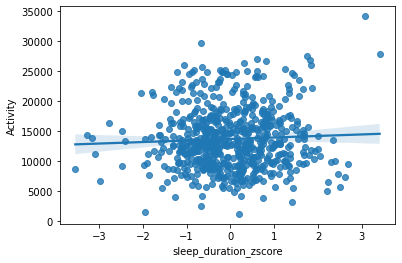

In [21]:
sns.regplot(x='sleep_duration_zscore', y='Activity', data=timet_activity)

In [22]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.002
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.511
Date:                Sun, 21 Aug 2022   Prob (F-statistic):              0.220
Time:                        23:38:07   Log-Likelihood:                -6357.4
No. Observations:                 639   AIC:                         1.272e+04
Df Residuals:                     637   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  1.366e+04    200.661     68.061      0.000    1.33e+04    1.41e+04
sleep_duration_zscore   253.4606    206.223      1.229      0.220    -151.498     658.419
==============================================================================
Omnibus:                       35.187   Durbin-Watson:                   0.691
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               39.594
Skew:                           0.601   Prob(JB):                     2.53e-09
Kurtosis:                       3.202   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Standarized Bedtime vs Activity**

In [24]:
predictors = ['bedtime_zscore']
X = timet_activity[predictors]
Y = timet_activity['Activity']
X = sm.add_constant(X)
model = sm.OLS(Y,X)
results = model.fit()

<AxesSubplot:xlabel='bedtime_zscore', ylabel='Activity'>

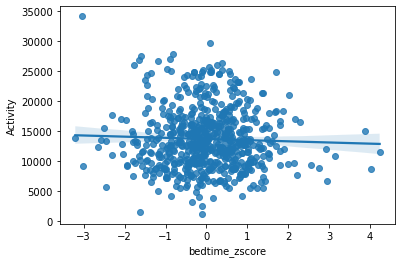

In [25]:
sns.regplot(x='bedtime_zscore', y='Activity', data=timet_activity)

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Activity   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.8876
Date:                Sun, 21 Aug 2022   Prob (F-statistic):              0.346
Time:                        23:40:03   Log-Likelihood:                -6357.7
No. Observations:                 639   AIC:                         1.272e+04
Df Residuals:                     637   BIC:                         1.273e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           1.366e+04    200.759     68.028      0.000    1.33e+04    1.41e+04
bedtime_zscore  -194.3805    206.323     -0.942      0.346    -599.536     210.775
==============================================================================
Omnibus:                       36.057   Durbin-Watson:                   0.692
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.692
Skew:                           0.608   Prob(JB):                     1.46e-09
Kurtosis:                       3.223   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""